# Lab 3: Advanced Data Visualization with 3D Techniques

## Dataset Overview
This dataset comes from UCI and is the Steel Industry Energy Consumption dataset donated on 8/13/2023. The data was collected from a small-scale smart steel industry in South Korea. This dataset consists of time series power usage measurements. It consists of ten key features. The features provide energry consumption in kilowatt hours, reactive power drawn when current lags and leads voltage, estimated CO2 emission in metric tons, Efficiency of power usage when current lags and leads, number of seconds since midnight, an indicator for whether the entry is from a weekday or weekend, the day of the week, and a label indicating whether the load is Light, Medium, or High.

In [147]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
from scipy.interpolate import griddata

%matplotlib inline

In [149]:
# Load dataset
df = pd.read_csv("Steel_industry_data.csv")
# Display first five entries in dataset
df.head(5)

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


## Visualization 1: 3D Scattere of Time vs Usage vs CO2

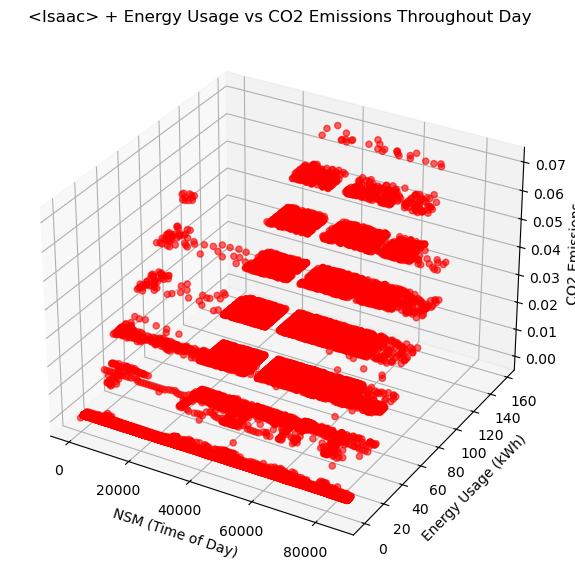

In [152]:
fig1 = plt.figure(figsize=(10, 7))
ax = fig1.add_subplot(111, projection='3d')
# Create 3D scatter plot
ax.scatter(df['NSM'], df['Usage_kWh'], df['CO2(tCO2)'], c='red', alpha=0.6)
# Axis labels and title
ax.set_xlabel('NSM (Time of Day)')
ax.set_ylabel('Energy Usage (kWh)')
ax.set_zlabel('CO2 Emissions')
plt.title('<Isaac> + Energy Usage vs CO2 Emissions Throughout Day')
# Save the figure as an image
plt.savefig('Isaac_3DScatter_Energy_CO2.png')
plt.show()

This scatter plot shows how energy usage varies with CO2 emissions across different times of day.
- Highlight: As NSM increases, there is a general increase in usage with spikes in CO2.
- Insight: It helps identify the times of day when emissions peak and indicates areas for optimization.

# Visualization 2: Reactive Power vs Usage

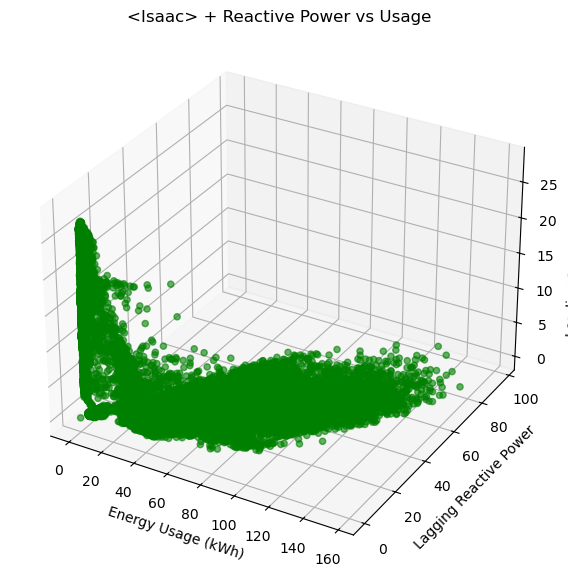

In [155]:
fig2 = plt.figure(figsize=(10, 7))
ax = fig2.add_subplot(111, projection='3d')
# Create 3D scatter plot with energy usage vs lagging vs leading reactive power
ax.scatter(df['Usage_kWh'],
            df['Lagging_Current_Reactive.Power_kVarh'],
            df['Leading_Current_Reactive_Power_kVarh'],
            c='green', alpha=0.6)
# Axis labels and title
ax.set_xlabel('Energy Usage (kWh)', fontsize=10)
ax.set_ylabel('Lagging Reactive Power', fontsize=10)
ax.set_zlabel('Leading Reactive Power', fontsize=10)
plt.title('<Isaac> + Reactive Power vs Usage', fontsize=12)
# Saving plot as an image
plt.savefig('Isaac_3DScatter_ReactivePower.png', dpi=300)
plt.show()

This 3D scatter plot compares the energy usage of lagging and leading reactive power.
- Highlight: Clusters indicate usage patterns correlate with one type of reactive power more than the other.
- Insight: Operational characteristics affecting power factor can be identified.

# Visualization 3: Average CO2 Emissions by Day of Week

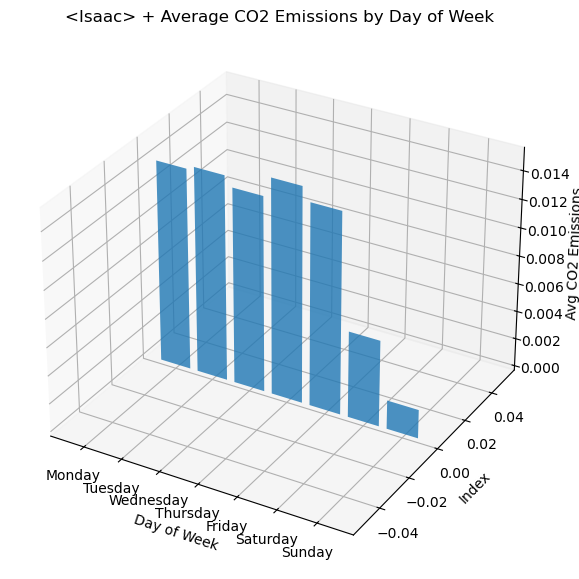

In [159]:
# Group data by day of week and compute average CO2 values
df_grouped = df.groupby('Day_of_week')["CO2(tCO2)"].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
# Prepare data for 3D bar plot
x = np.arange(len(df_grouped.index))
y = df_grouped.values
z = np.zeros_like(x)

fig3 = plt.figure(figsize=(10, 7))
ax = fig3.add_subplot(111, projection='3d')
# Plot 3D bars
ax.bar(x, y, zs=z, zdir='y', alpha=0.8)
ax.set_xticks(x)
ax.set_xticklabels(df_grouped.index)
# Axis labels and title
ax.set_xlabel('Day of Week', fontsize=10)
ax.set_ylabel('Index', fontsize=10)
ax.set_zlabel('Avg CO2 Emissions', fontsize=10)
plt.title('<Isaac> + Average CO2 Emissions by Day of Week', fontsize=12)
plt.savefig('Isaac_3DBar_CO2_Day.png', dpi=300)
plt.show()

This 3D bar chart visualizes average CO2 Emissions by Day of Week.
- Highlight: Some weekdays emit more CO2, potentially reflecting higher production days.
- Insight: Helps plan for energy-efficient operations. 

# Visualization 4: Usage Throughout Day by Load Type

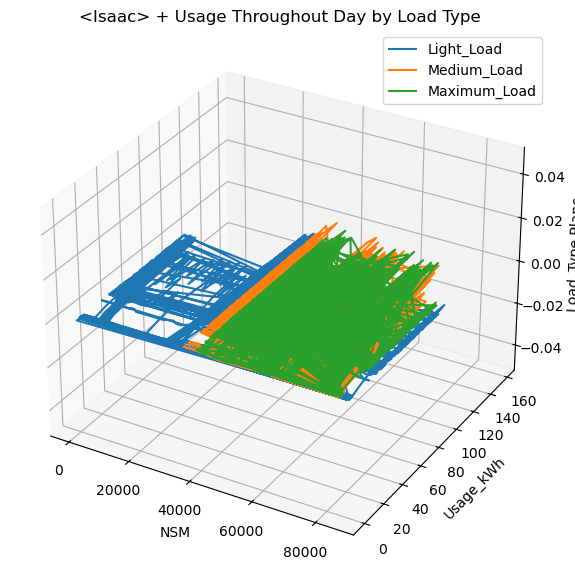

In [162]:
fig4 = plt.figure(figsize=(10, 7))
ax = fig4.add_subplot(111, projection='3d')

# Plot a line for each load type
for load_type in df['Load_Type'].unique():
    subset = df[df['Load_Type'] == load_type]
    ax.plot(subset['NSM'], subset['Usage_kWh'], zs=0, zdir='z', label=load_type)

# Axis labels, legend, and title
ax.set_xlabel('NSM', fontsize=10)
ax.set_ylabel('Usage_kWh', fontsize=10)
ax.set_zlabel('Load_Type Plane', fontsize=10)
plt.legend()
plt.title('<Isaac> + Usage Throughout Day by Load Type', fontsize=12)
plt.savefig('Isaac_3DLine_Usage_LoadType.png', dpi=300)
plt.show()


This 3D line plot tracks energy usage throughout the day, categorized by load type.
- Highlight: Light load is consistent while Heavy load spikes at certain NSM values.
- Insight: Production intensity by time of day can be inferred.

# Visualization 5: Wireframe of Lagging Power Factor

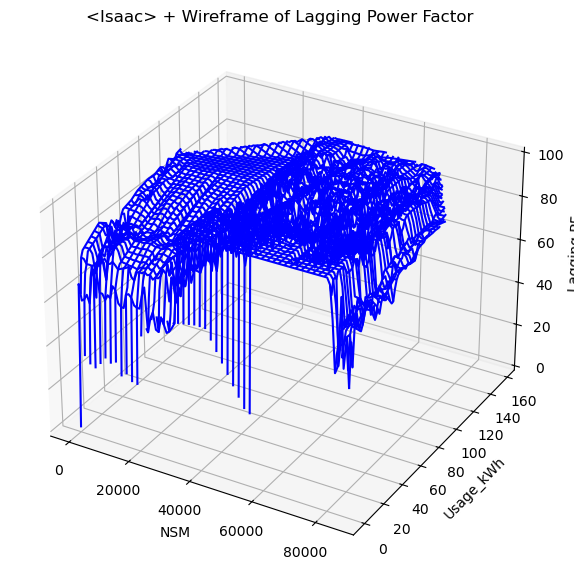

In [166]:
fig5 = plt.figure(figsize=(10, 7))
ax5 = fig5.add_subplot(111, projection='3d')

# Extract x, y, z values from dataframe
x = df['NSM']
y = df['Usage_kWh']
z = df['Lagging_Current_Power_Factor']

# Create a grid for interpolation
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
Xi, Yi = np.meshgrid(xi, yi)
# Interpolate z values on the grid
Zi = griddata((x, y), z, (Xi, Yi), method='linear')

# Plot the wireframe surface
ax5.plot_wireframe(Xi, Yi, Zi, color='blue')

# Axis labels and title
ax5.set_xlabel('NSM', fontsize=10)
ax5.set_ylabel('Usage_kWh', fontsize=10)
ax5.set_zlabel('Lagging PF', fontsize=10)
plt.title('<Isaac> + Wireframe of Lagging Power Factor', fontsize=12)
plt.savefig('Isaac_3DWireframe_LaggingPF.png', dpi=300)
plt.show()

This wireframe plot models how lagging power factor varies with time and energy usage.
- Highlight: Smoother regions show consistent efficiency and spikes highlight areas needing inspection.
- Insight: Useful for identifying when and where power quality is affected